# Project title : Analysing Amazon Sales Data 

1. To analyze the Sales-trend -> month-wise, year-wise, yearly_month-wise

2. Find key metrics and factors and show the meaningful relationships between attributes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Amazon Sales data.csv")

In [5]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [6]:
df.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [9]:
df.shape

(100, 14)

In [10]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [11]:
df.duplicated().sum()

0

# TO PERFORM MONTH WISE, YEAR WISE, YEARLY_MONTH WISE SALES TREND

In [13]:
# Extract date 
df["Order Date"]= pd.to_datetime(df["Order Date"])
df["Order Date"]

0    2010-05-28
1    2012-08-22
2    2014-05-02
3    2014-06-20
4    2013-02-01
        ...    
95   2011-07-26
96   2011-11-11
97   2016-06-01
98   2015-07-30
99   2012-02-10
Name: Order Date, Length: 100, dtype: datetime64[ns]

In [15]:
# To extract year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [16]:
df["Year"]

0     2010
1     2012
2     2014
3     2014
4     2013
      ... 
95    2011
96    2011
97    2016
98    2015
99    2012
Name: Year, Length: 100, dtype: int32

In [17]:
df["Month"]

0      5
1      8
2      5
3      6
4      2
      ..
95     7
96    11
97     6
98     7
99     2
Name: Month, Length: 100, dtype: int32

In [19]:
df["Total Sales"] = df["Units Sold"]* df["Unit Price"]

In [21]:
df["Total Sales"].sum()

137348768.31

In [22]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Total Sales
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,576782.80
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,3296425.02


# Analyze sales trend

In [24]:
Sales_Trends = df[['Order Date', 'Year', 'Month', 'Total Sales']]


In [26]:
Sales_Trends.head(10)

,Order Date,Year,Month,Total Sales
0,2010-05-28,2010,5,2533654.00
1,2012-08-22,2012,8,576782.80
2,2014-05-02,2014,5,1158502.59
3,2014-06-20,2014,6,75591.66
4,2013-02-01,2013,2,3296425.02
5,2015-02-04,2015,2,759202.72
6,2011-04-23,2011,4,2798046.49
7,2012-07-17,2012,7,1245112.92
8,2015-07-14,2015,7,496101.10
9,2014-04-18,2014,4,1356180.10


# Month wise sales trend

In [27]:
monthwise_sales = Sales_Trends.groupby(['Month'])['Total Sales'].sum()
monthwise_sales

Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Sales, dtype: float64

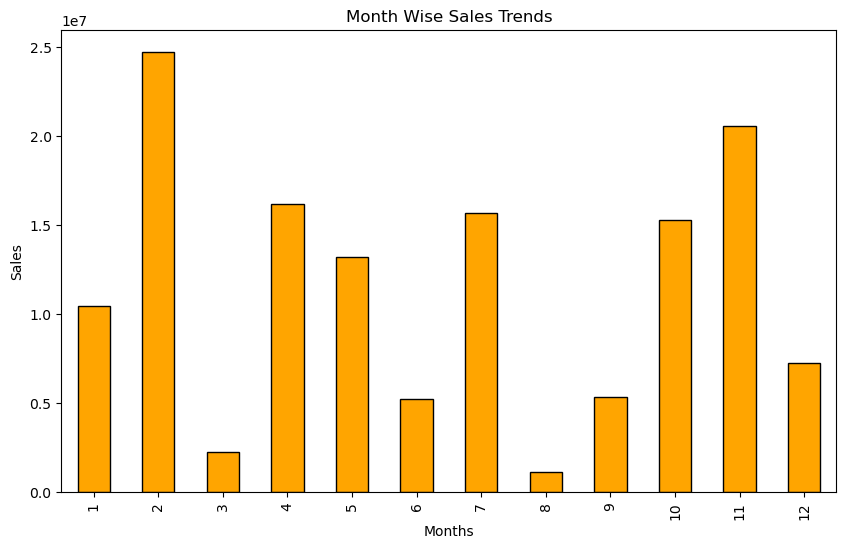

In [33]:
plt.figure(figsize = (10,6))
monthwise_sales.plot(kind = 'bar', color = 'orange', edgecolor = 'black')
plt.title("Month Wise Sales Trends")
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

# Year wise sales trend

In [34]:
yearwise_sales = Sales_Trends.groupby(['Year'])['Total Sales'].sum()
yearwise_sales

Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Sales, dtype: float64

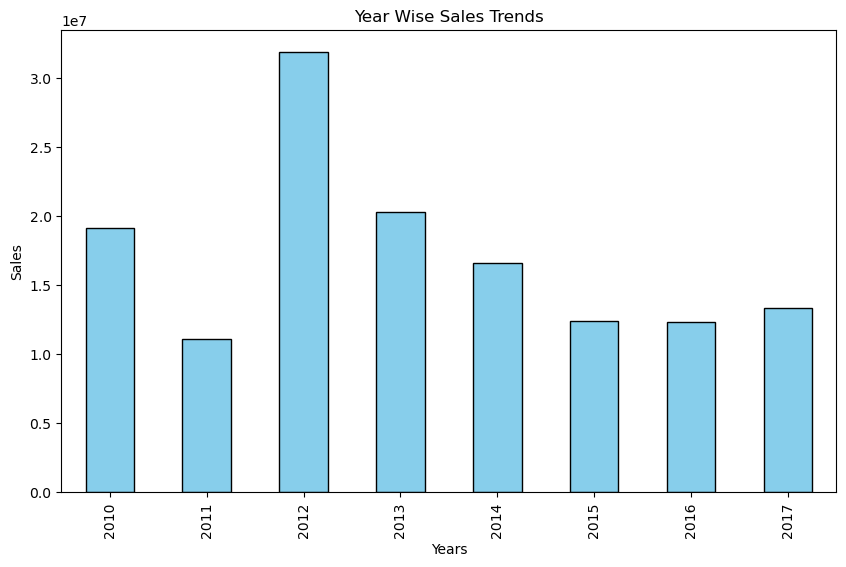

In [36]:
plt.figure(figsize = (10,6))
yearwise_sales.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')
plt.title("Year Wise Sales Trends")
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

# Yearly_Month_wise Sales

In [37]:
yearly_month_wise = Sales_Trends.groupby(['Year', 'Month'])['Total Sales'].sum()
yearly_month_wise

Year  Month
2010  2        3410661.12
      5        2587973.26
      6        1082418.40
      10       6064933.75
      11       3458252.00
      12       2581786.39
2011  1        1042225.35
      2         387002.20
      4        2798046.49
      5         272410.45
      6          19103.44
      7          97040.64
      9         574951.92
      11       5938385.58
2012  1        1012884.00
      2        6707849.42
      3         994765.42
      4        4556012.38
      5        3782781.82
      6        2132075.27
      7        4445093.92
      8         576782.80
      9        4648152.72
      10       3042246.77
2013  2        3296425.02
      3         835759.10
      4        3262562.10
      6        1352867.40
      7        8545511.20
      8          89623.98
      9          71253.21
      10       2702770.40
      12        173676.25
2014  2        1819660.25
      4        4510578.10
      5        3060338.59
      6          75591.66
      7         688641.85


In [38]:
sales_2010 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2010]
sales_2011 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2011]
sales_2012 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2012]
sales_2013 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2013]
sales_2014 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2014]
sales_2015 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2015]
sales_2016 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2016]
sales_2017 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2017]

# plt.figure(figsize=(20, 10))

plt.subplot(2,4,1)
plt.bar(sales_2010.index.get_level_values('Month'), sales_2010, color = 'red')
plt.title('Monthly Sales for the Year 2010')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,2)
plt.bar(sales_2011.index.get_level_values('Month'), sales_2011, color = 'blue')
plt.title('Monthly Sales for the Year 2011')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,3)
plt.bar(sales_2012.index.get_level_values('Month'), sales_2012, color = 'pink')
plt.title('Monthly Sales for the Year 2012')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,4)
plt.bar(sales_2013.index.get_level_values('Month'), sales_2013, color = 'yellow')
plt.title('Monthly Sales for the Year 2013')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,5)
plt.bar(sales_2014.index.get_level_values('Month'), sales_2014, color = 'skyblue')
plt.title('Monthly Sales for the Year 2014')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,6)
plt.bar(sales_2015.index.get_level_values('Month'), sales_2015, color = 'violet')
plt.title('Monthly Sales for the Year 2015')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,7)
plt.bar(sales_2016.index.get_level_values('Month'), sales_2016, color = 'purple')
plt.title('Monthly Sales for the Year 2016')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,8)
plt.bar(sales_2017.index.get_level_values('Month'), sales_2017, color = 'grey')
plt.title('Monthly Sales for the Year 2017')
plt.xlabel('Month')
plt.ylabel('Sales')


plt.tight_layout(pad=3.0)
plt.show()

# Observations:


Each bar shows monthly sales per year

# Visualise the relationship between attributes

Create following plots

1. A scatter plot of Units sold and Total Revenue, Unit price and Total revenue, Unit price and total profit
2. A count plot of Item Type and channels

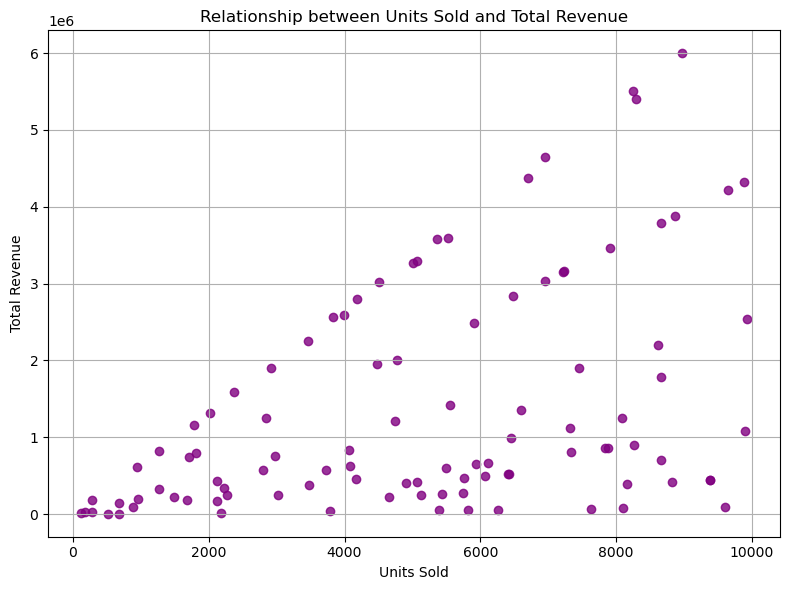

In [46]:
# Relationship between Units sold and total revenue 
plt.figure(figsize=(8, 6))
plt.scatter(df['Units Sold'], df['Total Revenue'], color='purple',alpha = 0.8)
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.title('Relationship between Units Sold and Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# Observations 

1. We observe that there is a relationship between Units Sold and Total Revenue 
2. As Unit Sales increases, Revenue also increases

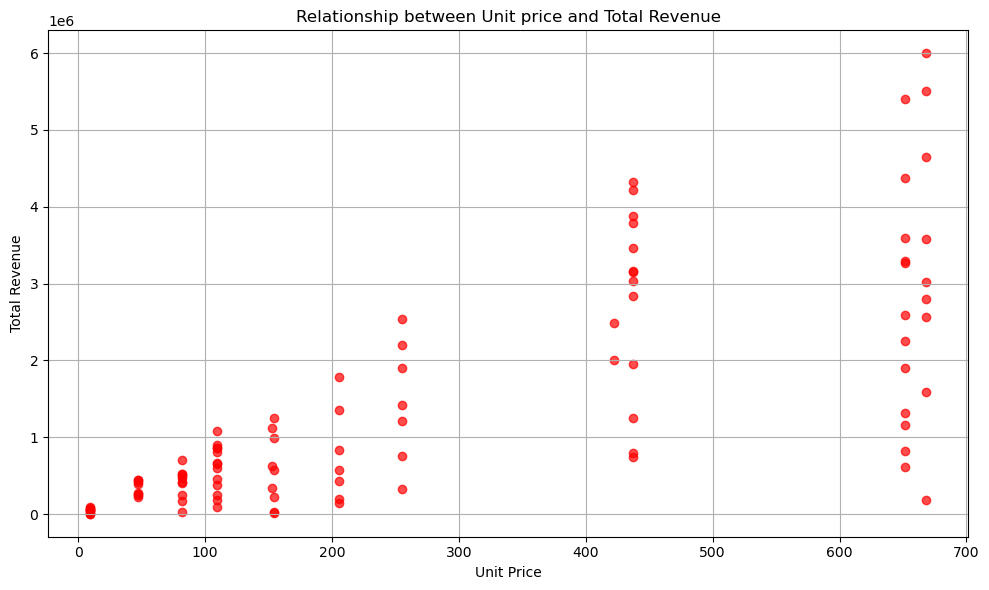

In [47]:
# Relationship between Unit Price and Total Revenue

plt.figure(figsize = (10,6))
plt.scatter(df['Unit Price'], df['Total Revenue'], color = 'red', alpha = 0.7)
plt.title("Relationship between Unit price and Total Revenue")
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# Observations

1. We observe that there is a relationship between unit price and total revenue
2. As per the observation higher unit prices lead to higher total revenue.

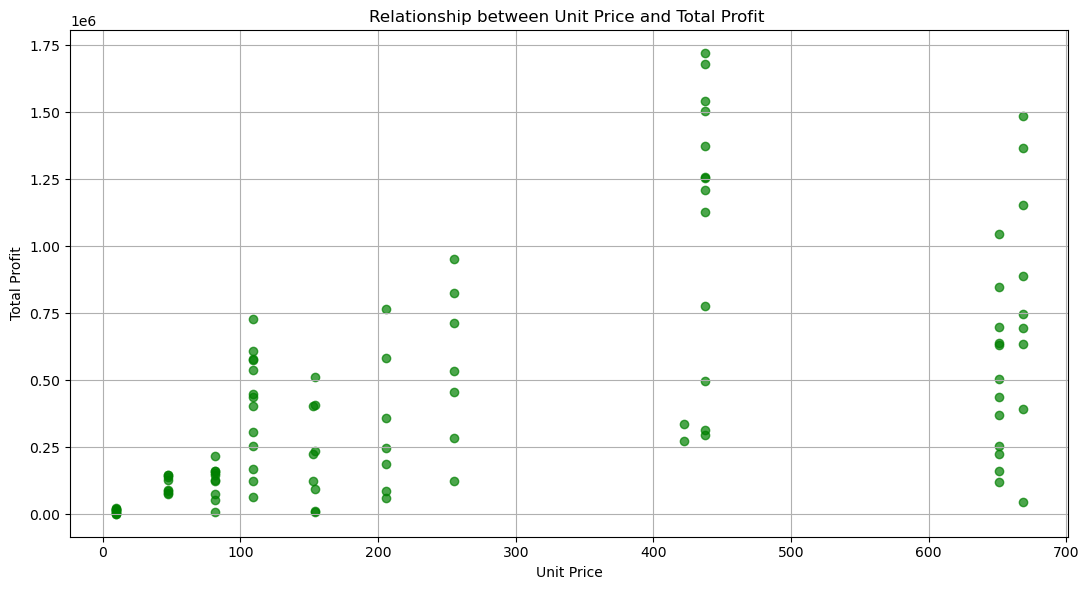

In [48]:
# Relationship between Unit Price and Total Profit

plt.figure(figsize = (11,6))
plt.scatter(df['Unit Price'], df['Total Profit'], color = 'green', alpha = 0.7)
plt.title("Relationship between Unit Price and Total Profit ")
plt.xlabel('Unit Price')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

# Observations

1. We observe that there is relationship between Unit Price and total profit
2. As per the observation unit price increases, the profit also increase
3. The profit is maximun between 400 and 500 unit price

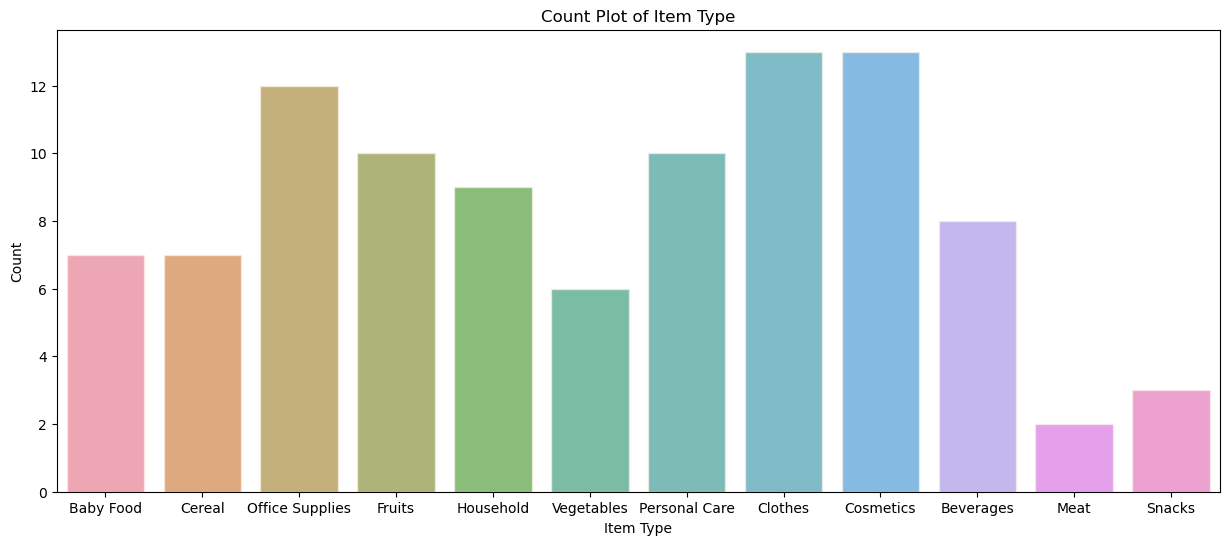

In [53]:
# Count plot of the "Item Type" feature

plt.figure(figsize=(15, 6))
colors = sns.color_palette('husl', len(df['Item Type'].unique()))
sns.countplot(data=df, x='Item Type', edgecolor='linen', alpha=0.7, palette=colors)
plt.title("Count Plot of Item Type")
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.show()

# Observations

We see that most customers choose clothes or cosmetics, having maximum purchases

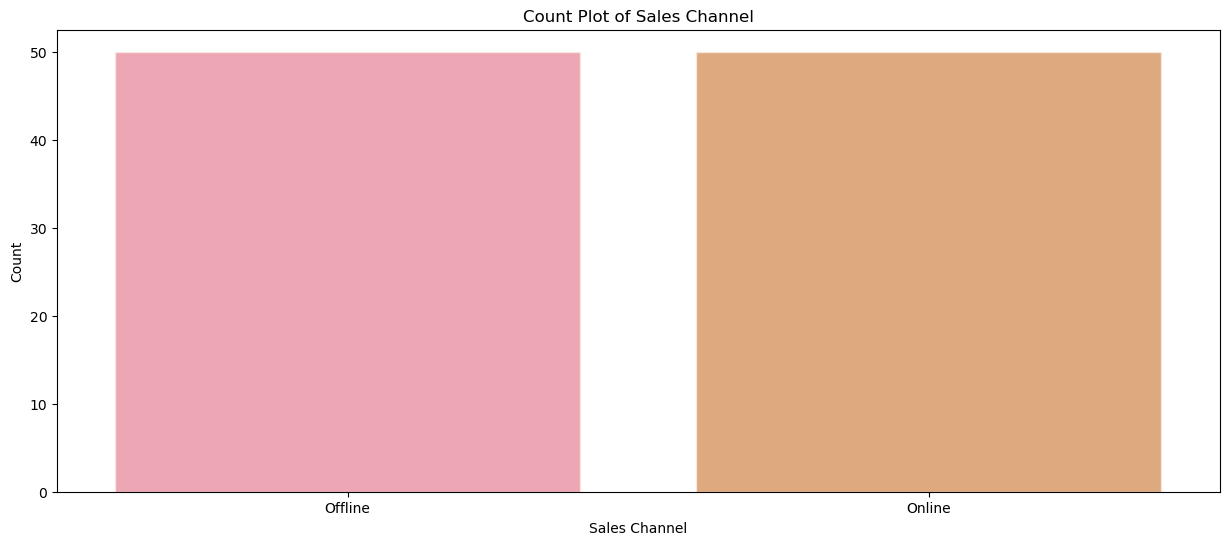

In [54]:
# Count plot of channel

plt.figure(figsize = (15,6))
colors = sns.color_palette('husl', len(df['Item Type'].unique()))

sns.countplot(data = df ,x = 'Sales Channel', edgecolor = 'linen', alpha = 0.7, palette = colors)

plt.title("Count Plot of Sales Channel")
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()

# Observations

We have seen that online and offline both are equally distributed

# Conclusion